In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%bash
./lattice 6 > start.xyz
head start.xyz

864
10.0776 10.0776 10.0776
Ar 0 0 0
Ar 0.8398 0 0.8398
Ar 0.8398 0.8398 0
Ar 0 0.8398 0.8398
Ar 0 0 1.6796
Ar 0.8398 0 2.5194
Ar 0.8398 0.8398 1.6796
Ar 0 0.8398 2.5194


In [19]:
%%bash
for friction in 0.01 0.1 1.0 10.0 100.0
do
cat > in_$friction << EOF
inputfile start.xyz
outputfile output.xyz
temperature 2.0
tstep 0.005
friction $friction
forcecutoff 2.5
listcutoff  3.0
nstep 100000
nconfig 10 trajectory.xyz
nstat   10 energies_$friction.dat
EOF
../cpp/simplemd.x < in_$friction &
done

Process is interrupted.


In [46]:
energies={}
for friction in ("0.01", "0.1", "1.0", "10.0", "100.0"):
    energies[friction]=np.loadtxt("energies_"+friction+".dat")

In [47]:
energies["1.0"].shape

(10000, 6)

Text(0.5, 1.0, 'Potential energy')

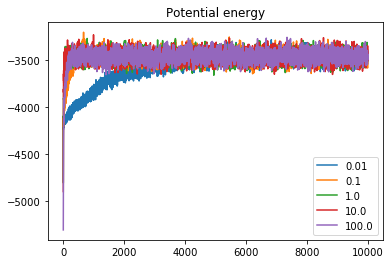

In [49]:
for k in energies.keys():
    plt.plot(energies[k][:,3],label=k)
plt.legend()
plt.title("Potential energy")
#plt.xlim((0,200))

Text(0.5, 1.0, 'Instanteneous temperature')

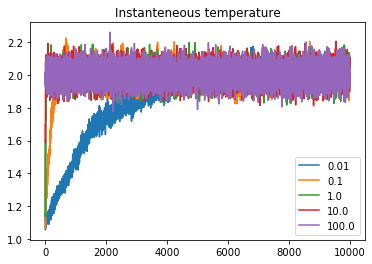

In [50]:
for k in energies.keys():
    plt.plot(energies[k][:,2],label=k)
plt.legend()
plt.title("Instanteneous temperature")

In [ ]:
%%bash
for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.2 1.5 2.0 2.5 3.0
do
cat > in_T_$T << EOF
inputfile start.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies_T_$T.dat
EOF
../cpp/simplemd.x < in_T_$T &
done

In [103]:
Tlist=["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "1.2", "1.5", "2.0", "2.5", "3.0"]
energies={}
for T in Tlist:
    energies[T]=np.loadtxt("energies_T_"+T+".dat")

Text(0.5, 1.0, 'Instanteneous temperature')

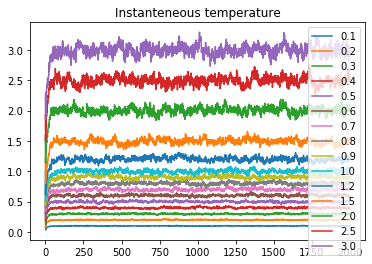

In [93]:
for k in energies.keys():
    plt.plot(energies[k][:,2],label=k)
plt.legend()
plt.title("Instanteneous temperature")

Text(0.5, 1.0, 'Potential energy')

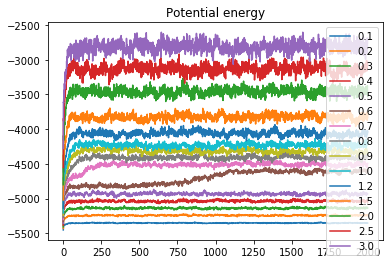

In [94]:
for k in energies.keys():
    plt.plot(energies[k][:,3],label=k)
plt.legend()
plt.title("Potential energy")

In [95]:
C_U=[]
C_K=[]
Tfloat=[]
average_U=[]
for T in Tlist:
    Tfloat.append(float(T))
    C_U.append(np.std(energies[T][250:,3])**2/float(T)**2)
    average_U.append(np.average(energies[T][250:,3]))
    #C_K.append()
C_U=np.array(C_U)
Tfloat=np.array(Tfloat)

In [96]:
C_U

array([ 1301.29476033,  1049.97909395,   991.09138106,   978.72997354,
        1061.78649437, 22988.79675488,   945.2526723 ,   970.51419462,
        1001.03351325,   823.07931372,   888.34853352,   798.72351435,
         644.49206278,   605.7774104 ,   560.28890366])

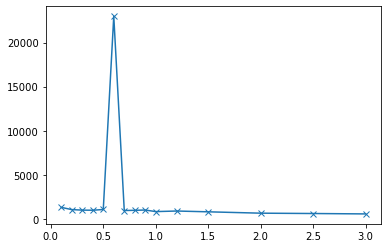

In [97]:
plt.plot(Tfloat,C_U,"x-")

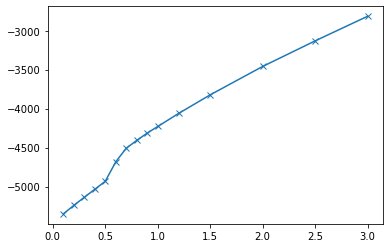

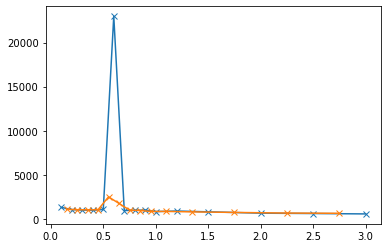

In [98]:
plt.plot(Tfloat,average_U,"x-")
plt.show()
C_U2=[]
for i in range(len(Tfloat)-1):
    C_U2.append((average_U[i+1]-average_U[i])/(Tfloat[i+1]-Tfloat[i]))
plt.plot(Tfloat,C_U,"x-")
plt.plot(0.5*(Tfloat[:-1]+Tfloat[1:]),C_U2,"x-")

In [ ]:
%%bash
../cpp/simplemd.x < in_T_3.0
mv output.xyz start_3.0.xyz

In [ ]:
%%bash
for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.2 1.5 2.0 2.5 3.0
do
cat > in_T_$T << EOF
inputfile start_3.0.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies_T2_$T.dat
EOF
../cpp/simplemd.x < in_T_$T &
done

In [114]:
Tlist=["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "1.2", "1.5", "2.0", "2.5", "3.0"]
energies2={}
for T in Tlist:
    energies2[T]=np.loadtxt("energies_T2_"+T+".dat")

Text(0.5, 1.0, 'Potential energy (cooling)')

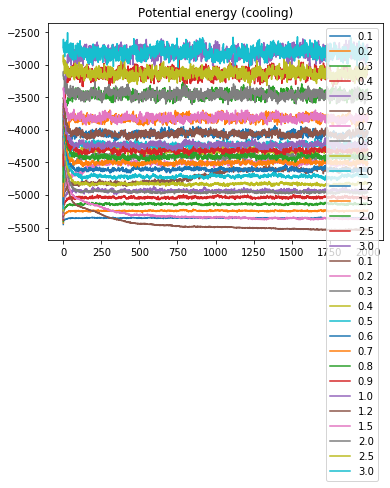

In [115]:
for k in energies.keys():
    plt.plot(energies[k][:,3],label=k)
for k in energies2.keys():
    plt.plot(energies2[k][:,3],label=k)
plt.legend()
plt.title("Potential energy (cooling)")

In [116]:
C_U2=[]
Tfloat=[]
average_U2=[]
for T in Tlist:
    Tfloat.append(float(T))
    C_U2.append(np.std(energies2[T][250:,3])**2/float(T)**2)
    average_U2.append(np.average(energies2[T][250:,3]))
    #C_K.append()
C_U2=np.array(C_U2)
Tfloat=np.array(Tfloat)

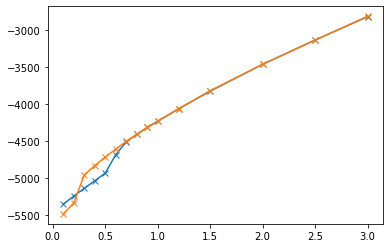

In [117]:
plt.plot(Tfloat,average_U,"x-")
plt.plot(Tfloat,average_U2,"x-")

In [ ]:
cat > in_T_$T << EOF
inputfile start_3.0.xyz
outputfile output.xyz
temperature 3.0
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies_T2_vr_$T.dat
EOF
../cpp/simplemd_vr.x < in_T_$T &

In [147]:
langevin=np.loadtxt("energies_T2_3.0.dat")
vr=np.loadtxt("energies_T2_vr_.dat")

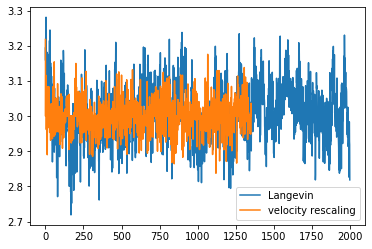

In [148]:
plt.plot(langevin[:,2],label="Langevin")
plt.plot(vr[:,2],label="velocity rescaling")
plt.legend()

In [149]:
vr[:20,2]

array([3.21816 , 3.      , 3.116345, 3.      , 3.073526, 3.      ,
       2.961995, 3.      , 3.009591, 3.      , 2.961864, 3.      ,
       2.890318, 3.      , 3.083807, 3.      , 3.001065, 3.      ,
       2.967514, 3.      ])

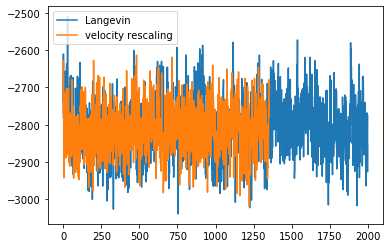

In [150]:
plt.plot(langevin[:,3],label="Langevin")
plt.plot(vr[:,3],label="velocity rescaling")
plt.legend()

In [151]:
np.std(langevin[:,3]),np.std(vr[:,3])

(73.7553588187395, 62.892447058695865)